In [1]:
#x텐서플로 라이브러리 안에 있는 케라스 api에서 필요한 함수들을 불러옵니다 .
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [2]:
#데이터를 다루는데 필요한 라이브러리를 불러옵니다 .
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [4]:
#준비된 수술 환자 데이터를 불러옵니다 .
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=',')
print(Data_set)
x = Data_set[:,0:16] #환자의 진찰 기록을 x 로 저장합니다. 
y = Data_set[:,16] # 수술 1년 후 사망/ 생존 여부를 y로 지정합니다. 
#클래스 
#딥러닝 모델의 구조를 결정합니다 .
model = Sequential()
model.add(Dense(30, input_dim=16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

[[ 1.    2.88  2.16 ...  0.   60.    0.  ]
 [ 2.    3.4   1.88 ...  0.   51.    0.  ]
 [ 2.    2.76  2.08 ...  0.   59.    0.  ]
 ...
 [ 2.    3.04  2.08 ...  0.   52.    0.  ]
 [ 2.    1.96  1.68 ...  0.   79.    0.  ]
 [ 2.    4.72  3.56 ...  0.   51.    0.  ]]


In [5]:
# 딥러닝 모델을 실행합니다 .
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x, y ,epochs=5,batch_size=16 )

Epoch 1/5
30/30 [==============================] - 0s 655us/step - loss: 9.3854 - accuracy: 0.1489
Epoch 2/5
30/30 [==============================] - 0s 551us/step - loss: 1.0368 - accuracy: 0.6170
Epoch 3/5
30/30 [==============================] - 0s 506us/step - loss: 0.5209 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 526us/step - loss: 0.4367 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 517us/step - loss: 0.4329 - accuracy: 0.8511


In [6]:
!pip install seaborn

In [7]:
df= pd.read_csv("./data/pima-indians-diabetes3.csv")
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [9]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.corr() #각항목들간의 상관관계

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
colormap = plt.cm.gist_heat # 그래프의 색상 구성을 정합니다
plt.figure(figsize=(12,12)) #그래프의크기를 정합니다

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

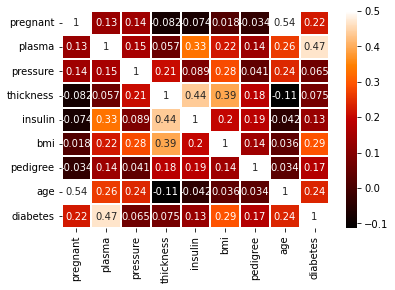

In [12]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor="white",annot=True)
plt.show()#상관관계를 그래프로표현

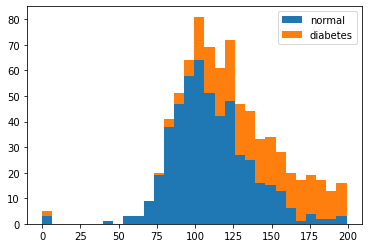

In [13]:
plt.hist(x=[df.plasma[df.diabetes==0],df.plasma[df.diabetes==1]], bins=30,histtype='barstacked',label=['normal','diabetes'])
plt.legend()

In [14]:
X = df.iloc[0:,0:8] # 세부정보를 x로 지정합니다

y = df.iloc[:,8] # 딩뇨병 여부를 y로 지정합니다.
X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
#다음과 같이 모델구조를 지정합니다. 
model = Sequential()
model.add(Dense(12, input_dim=8 ,activation='relu',name='Dense_1'))
model.add(Dense(8 ,activation='relu',name='Dense_2'))
model.add(Dense(1 ,activation='relu',name='Dense_3'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
Dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
Dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X,y, epochs=100,batch_size=5)

Epoch 1/100
154/154 [==============================] - 0s 563us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 2/100
154/154 [==============================] - 0s 530us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 3/100
154/154 [==============================] - 0s 526us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 4/100
154/154 [==============================] - 0s 529us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 5/100
154/154 [==============================] - 0s 526us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 6/100
154/154 [==============================] - 0s 575us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 7/100
154/154 [==============================] - 0s 593us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 8/100
154/154 [==============================] - 0s 584us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 9/100
154/154 [==============================] - 0s 586us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 10/100
154/154 [==============================] - 0s 577us/step - l